<a href="https://colab.research.google.com/github/sutummala/ResMHCNN/blob/main/MultiHeadConv_LC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the required libraries

In [ ]:
#import pydicom
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split

Loading the data

In [ ]:
X = np.load('/content/drive/MyDrive/Datasets/lung_colon_image_set/X.npy')
y = np.load('/content/drive/MyDrive/Datasets/lung_colon_image_set/y.npy')

In [ ]:
print(X.shape)
print(y.shape)
print(np.unique(y))

(25000, 224, 224, 3)
(25000,)
[0. 1. 2. 3. 4.]


Splitting the data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)

In [ ]:
!pip install keras-multi-head
from keras_multi_head import MultiHead

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)        │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_1 (Conv2D)         │ (None, 224, 224, 64)   │          1,792 │ Input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MaxPool2D_1               │ (None, 112, 112, 64)   │              0 │ Conv2D_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Multi-Head-1 (MultiHead)  │ (None, 112, 112, 64,   │        340,160 │ MaxPool2D_1[0][0]      │
│                           │ 3)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv3D_1 (Conv3D)         │ (None, 112, 112, 64,   │              4 │ Multi-Head-1[0][0]     │
│                           │ 1)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_add_18         │ (None, 112, 112, 64)   │              0 │ Conv3D_1[0][0],        │
│ (MultiHeadADD)            │                        │                │ MaxPool2D_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_2 (Conv2D)         │ (None, 112, 112, 32)   │         18,464 │ multi_head_add_18[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MaxPool2D_2               │ (None, 56, 56, 32)     │              0 │ Conv2D_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Multi-Head-2 (MultiHead)  │ (None, 56, 56, 32, 3)  │         85,088 │ MaxPool2D_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv3D_2 (Conv3D)         │ (None, 56, 56, 32, 1)  │              4 │ Multi-Head-2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_add_19         │ (None, 56, 56, 32)     │              0 │ Conv3D_2[0][0],        │
│ (MultiHeadADD)            │                        │                │ MaxPool2D_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_3 (Conv2D)         │ (None, 56, 56, 32)     │          9,248 │ multi_head_add_19[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MaxPool2D_3               │ (None, 28, 28, 32)     │              0 │ Conv2D_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Multi-Head-3 (MultiHead)  │ (None, 28, 28, 32, 3)  │         35,936 │ MaxPool2D_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv3D_3 (Conv3D)         │ (None, 28, 28, 32, 1)  │              4 │ Multi-Head-3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_add_20         │ (None, 28, 28, 32)     │              0 │ Conv3D_3[0][0],        │
│ (MultiHeadADD)       

 Total params: 528,337 (2.02 MB)

 Trainable params: 528,337 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

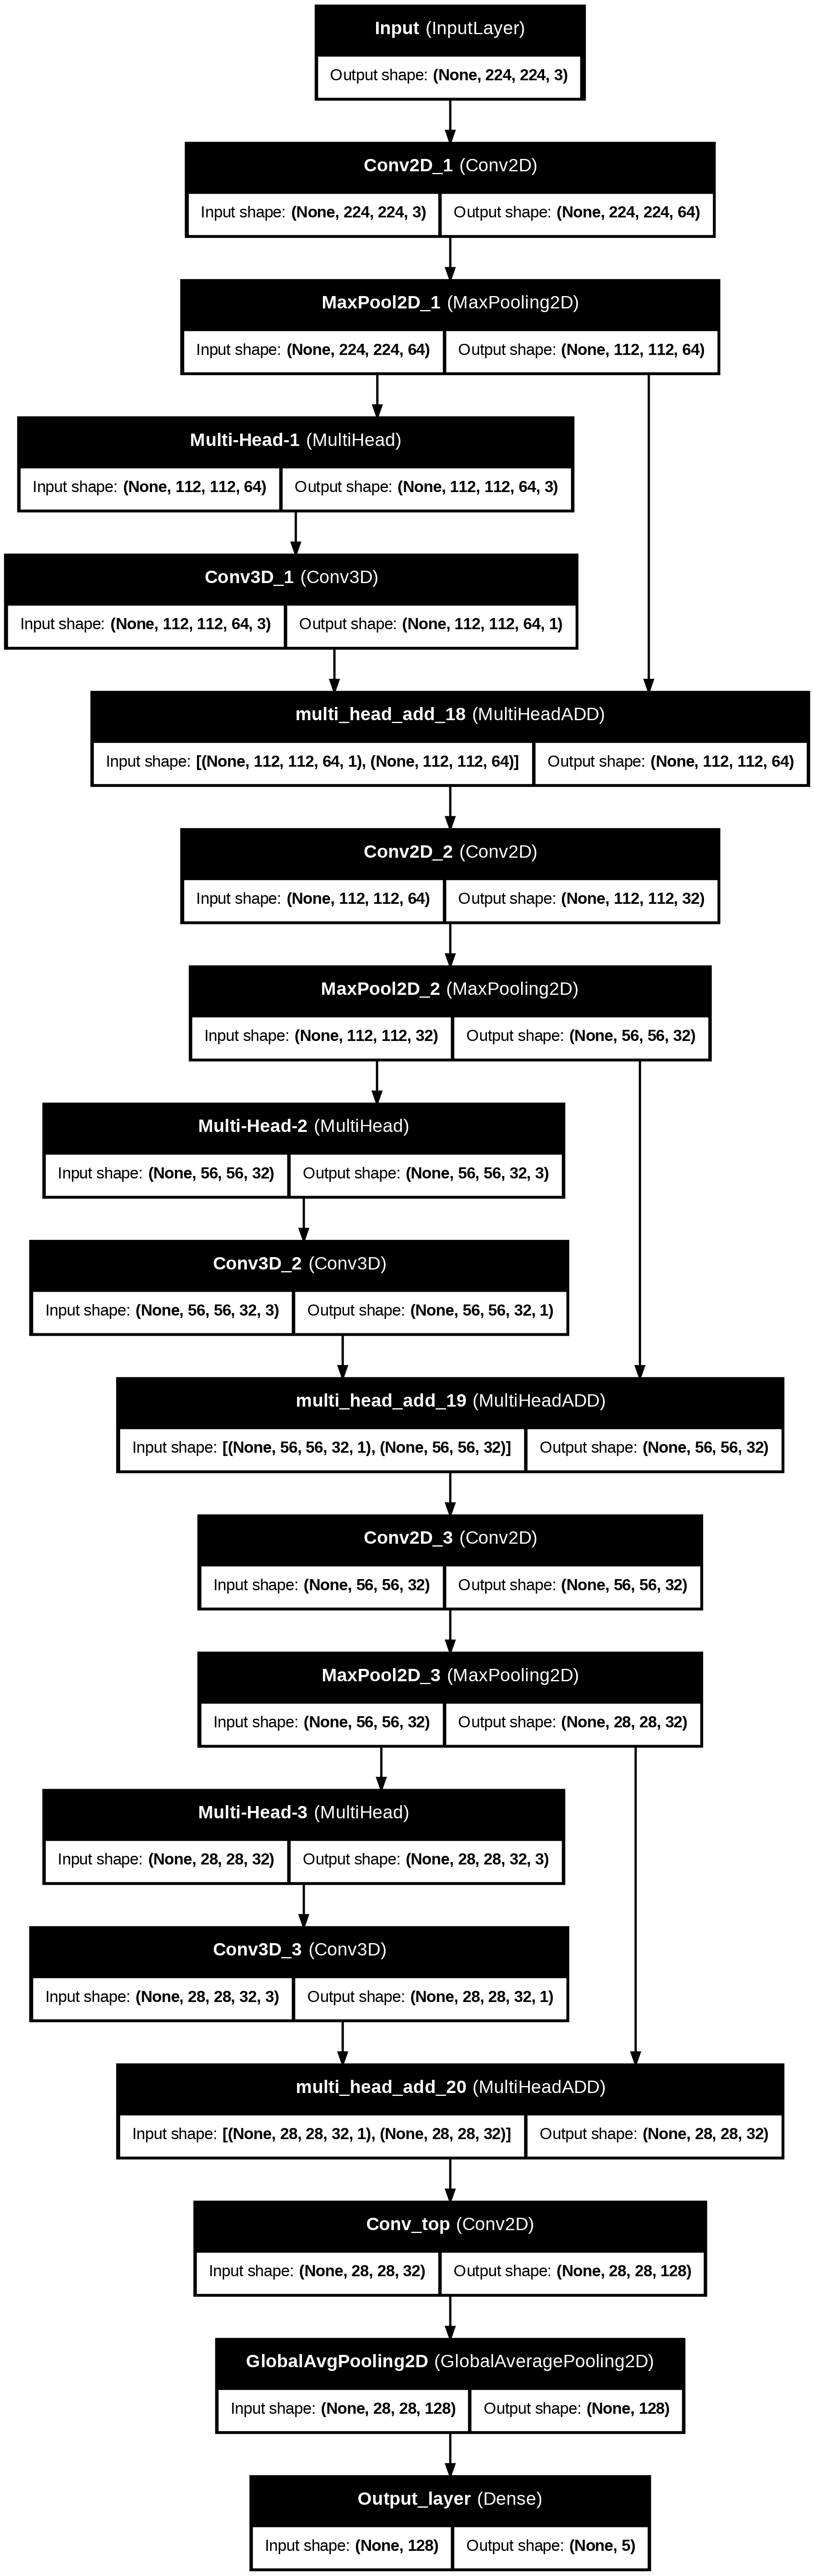

In [ ]:
class MultiHeadADD(tf.keras.layers.Layer):
  def call(self, x, y):
    return tf.squeeze(x, axis=-1) + y

IMAGE_SIZE = (224, 224, 3)
input_layer = tf.keras.Input(shape = IMAGE_SIZE, name = "Input")
#contrast_layer = tf.keras.layers.Lambda(lambda x: tf.image.central_crop(x, 0.75))(input_layer)
conv_layer_1 = tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation = 'gelu', padding='same', name = 'Conv2D_1')(input_layer)
pooling_layer_1 = tf.keras.layers.MaxPooling2D(2, 2, name='MaxPool2D_1')(conv_layer_1)
att_layer_1 = MultiHead([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation = 'gelu', padding='same'),], name='Multi-Head-1')(pooling_layer_1)
att_add_layer_1 = tf.keras.layers.Conv3D(filters=1, kernel_size=1, activation = 'gelu', padding='same', name='Conv3D_1')(att_layer_1)
add_layer_1 = MultiHeadADD()(att_add_layer_1, pooling_layer_1)
conv_layer_2 = tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation = 'gelu', padding='same', name = 'Conv2D_2')(add_layer_1)
pooling_layer_2 = tf.keras.layers.MaxPooling2D(2, 2, name = 'MaxPool2D_2')(conv_layer_2)
att_layer_2 = MultiHead([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=7, activation = 'gelu', padding='same'),], name='Multi-Head-2')(pooling_layer_2)
att_add_layer_2 = tf.keras.layers.Conv3D(filters=1, kernel_size=1, activation = 'gelu', padding='same', name='Conv3D_2')(att_layer_2)
add_layer_2 = MultiHeadADD()(att_add_layer_2, pooling_layer_2)
conv_layer_3 = tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation = 'gelu', padding='same', name='Conv2D_3')(add_layer_2)
pooling_layer_3 = tf.keras.layers.MaxPooling2D(2, 2, name = 'MaxPool2D_3')(conv_layer_3)
att_layer_3 = MultiHead([
    tf.keras.layers.Conv2D(filters=32, kernel_size=1, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation = 'gelu', padding='same'),], name='Multi-Head-3')(pooling_layer_3)
att_add_layer_3 = tf.keras.layers.Conv3D(filters=1, kernel_size=1, activation = 'gelu', padding='same', name = 'Conv3D_3')(att_layer_3)
add_layer_3 = MultiHeadADD()(att_add_layer_3, pooling_layer_3)
conv_layer_4 = tf.keras.layers.Conv2D(filters = 128, kernel_size=3, activation = 'gelu', padding='same', name='Conv_top')(add_layer_3)
pooling_layer_4 = tf.keras.layers.GlobalAveragePooling2D(name = 'GlobalAvgPooling2D')(conv_layer_4)
prediction_layer = tf.keras.layers.Dense(units = 5, activation = 'softmax', name = 'Output_layer')(pooling_layer_4)
model = tf.keras.Model(inputs = input_layer, outputs = prediction_layer)
model.summary()
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adadelta(learning_rate = 0.9), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_test, y_test, batch_size = 16, epochs = 40)

Epoch 1/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.4247 - loss: 5.3072
Epoch 2/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.7099 - loss: 0.6520
Epoch 3/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.8210 - loss: 0.4672
Epoch 4/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.8825 - loss: 0.3292
Epoch 5/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.9064 - loss: 0.2695
Epoch 6/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.8954 - loss: 0.2675
Epoch 7/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.9221 - loss: 0.2142
Epoch 8/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.9216 - loss: 0.1990
Epoch 9/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.9241 - loss: 0.1938
Epoch 10/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.9337 - loss: 0.1902
Epoch 11/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.9382 - loss: 0.1639
Epoch 12/40
313/313 ━━━━━━━━━━

In [ ]:
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis = 1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step


In [ ]:
import sklearn

In [ ]:
print(f'Accuracy {sklearn.metrics.accuracy_score(y_test, y_pred)}')

if 1:
  AUC = sklearn.metrics.roc_auc_score(y_test, y_prob, average = 'weighted', multi_class='ovr')
else:
  AUC = sklearn.metrics.roc_auc_score(y_test, y_pred)
print(f'AUC is {AUC}')

target_names = ['Lung_aca', 'Lung_n', 'Lung_scc', 'Colon_aca', 'Colon_n']

print('F1-score', sklearn.metrics.f1_score(y_test, y_pred, average = 'weighted'))
print(f'Balanced accuracy {sklearn.metrics.balanced_accuracy_score(y_test, y_pred)}')
#print('Average-precision-score', sklearn.metrics.average_precision_score(y_test, y_prob, average = 'weighted'))
print(f'MCC {sklearn.metrics.matthews_corrcoef(y_test, y_pred)}')
print(f'{sklearn.metrics.classification_report(y_test, y_pred, target_names=target_names)}')
#print(f'{sklearn.metrics.precision_recall_fscore_support(y_test, y_prob)}')

Accuracy 0.9964
AUC is 0.9999500793176017
F1-score 0.9963994529057549
Balanced accuracy 0.9963726926301778
MCC 0.995505068725007
              precision    recall  f1-score   support

    Lung_aca       0.99      0.99      0.99       998
      Lung_n       1.00      1.00      1.00       990
    Lung_scc       1.00      0.99      0.99       989
   Colon_aca       1.00      1.00      1.00      1016
     Colon_n       1.00      1.00      1.00      1007

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



[[9.94989980e-01 1.00200401e-03 0.00000000e+00 3.00601202e-03
  1.00200401e-03]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.21334681e-02 0.00000000e+00 9.87866532e-01 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.93048659e-04
  9.99006951e-01]]


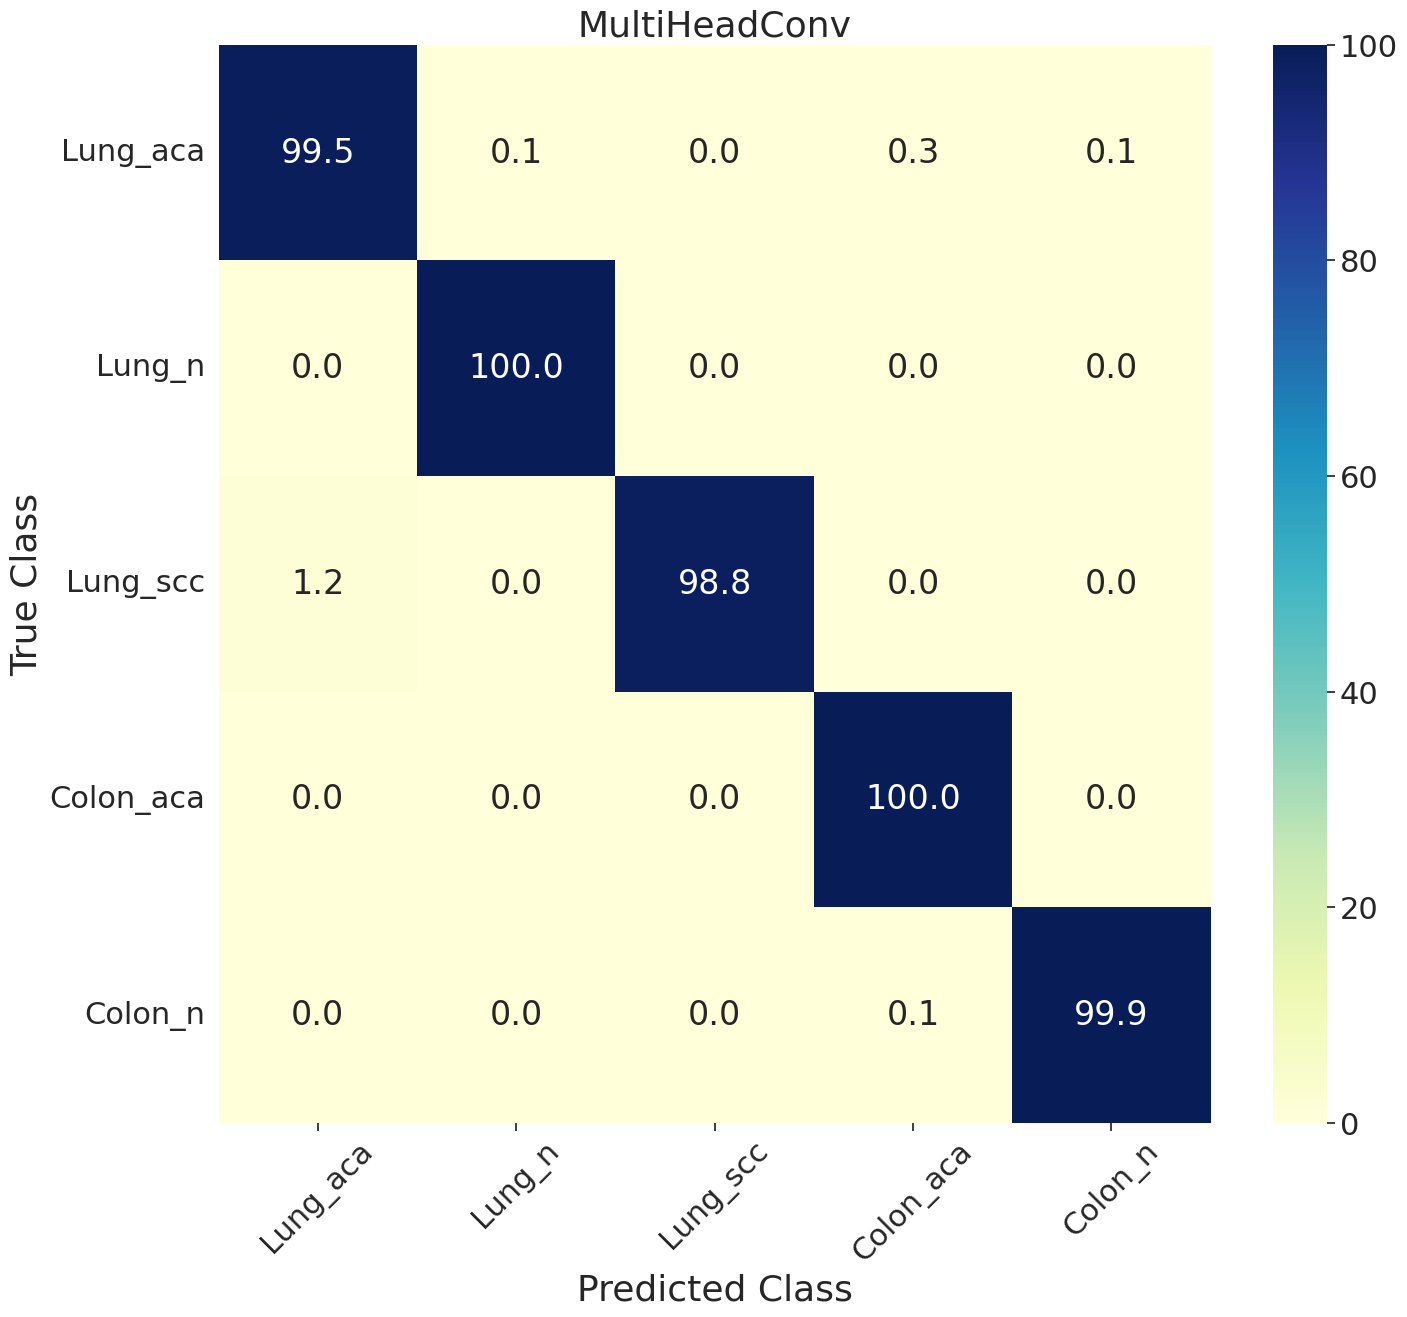

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_mat = confusion_matrix(y_test, y_pred, normalize = 'true')

if 1:
  class_names = ['Lung_aca', 'Lung_n', 'Lung_scc', 'Colon_aca', 'Colon_n']
else:
  class_names = ['Bad', 'Good']
print(confusion_mat)

# Plotting multilabel confusion matrix in a beautiful manner
sns.set(font_scale=2)
if 1:
  fig = plt.figure(figsize=(16, 14))
else:
  fig = plt.figure(figsize = (8,6))
ax= plt.subplot()
sns.heatmap(confusion_mat*100, annot=True, vmin = 0, vmax = 100, ax = ax, cmap = 'YlGnBu', fmt = '2.1f'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted Class', fontsize=26)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=45)
ax.xaxis.set_ticklabels(class_names, fontsize = 22)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Class', fontsize=26)
ax.yaxis.set_ticklabels(class_names, fontsize = 22)
plt.yticks(rotation=0)

plt.title('MultiHeadConv', fontsize=26)

plt.show()